# Unet Test Plots

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

from utils.training_utils import get_images_single_hit_raw, get_labels_single_hit_raw, get_data_flat_raw
from utils.metrics import dice_coef, get_coef_by_layer
%matplotlib inline

In [2]:
# Load model here
model_path = "models_saved/unet/unet-main.h5"
model = tf.keras.models.load_model(model_path, custom_objects={'dice_coef' : dice_coef})

C:\Users\msham6\AppData\Local\Continuum\anaconda3\envs\cs231n\lib\site-packages\tensorflow\python\keras\layers\core.py:820: UserWarning: models_files.unet_import is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


In [4]:
en1 = np.array([0.2])
en2 = np.arange(1.0, 41.0, 4.0)
test_energies = np.append(en1, en2); num_runs = 50
direct = 'simulations/single_hits/test/'

test_images = get_data_flat_raw(direct, test_energies, num_runs, 'images')
test_labels = get_data_flat_raw(direct, test_energies, num_runs, 'labels')
print(test_images.shape)

(16500, 32, 32, 1)


In [5]:
model.evaluate(test_images, test_labels, verbose=1)

16500/16500 [==============================] - 12s 707us/sample - loss: 0.0039 - dice_coef: 0.9339


[0.003938257979172649, 0.9338526]

# Metric vs layer (for one energy)

In [6]:
en1 = np.array([0.2])
en2 = np.arange(1.0, 41.0, 4.0)
test_energies = [25]
num_runs=50; num_layers=30
direct = 'simulations/single_hits/test/'

test_images = get_data_flat_raw(direct, test_energies, num_runs, 'images')
test_labels = get_data_flat_raw(direct, test_energies, num_runs, 'labels')
print(test_images.shape)
print(test_labels.shape)

(1500, 32, 32, 1)
(1500, 32, 32, 1)


In [23]:
img = 17
test_image = test_images[img, :, :, :]
test_image = np.expand_dims(test_image, axis=0)
image_2d = test_image[0, :, :, 0]

test_label = test_labels[img, :, :, :]
test_label = np.expand_dims(test_label, axis=0)
label_2d = test_label[0, :, :, 0]

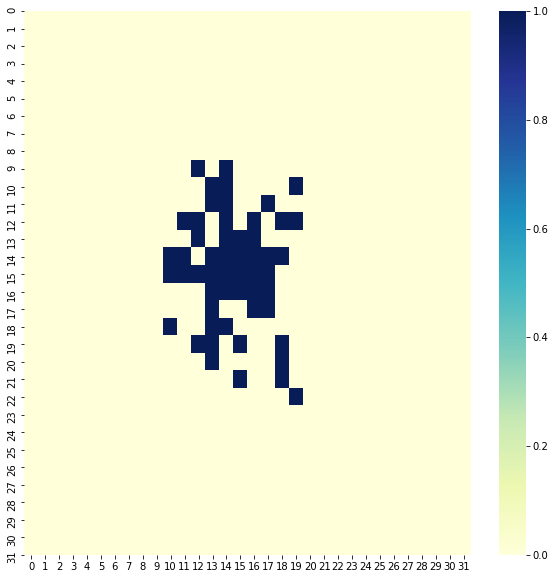

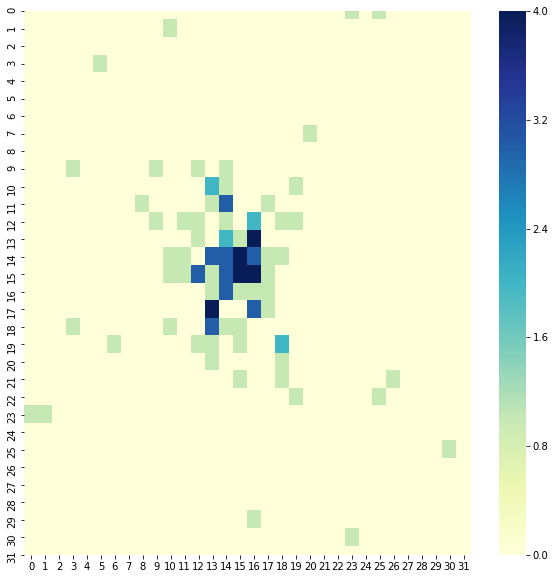

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10,10))
mask = label_2d == 0.0
ax = sns.heatmap(label_2d, fmt=".2", cmap='YlGnBu')
# ax.set_facecolor("black")
# plt.title("Test truth label")
plt.show()

plt.figure(figsize=(10,10))
ax = sns.heatmap(image_2d, fmt=".2", vmax = 4, cmap='YlGnBu')
# ax.set_facecolor("black")
# plt.title("Test truth label")
plt.show()

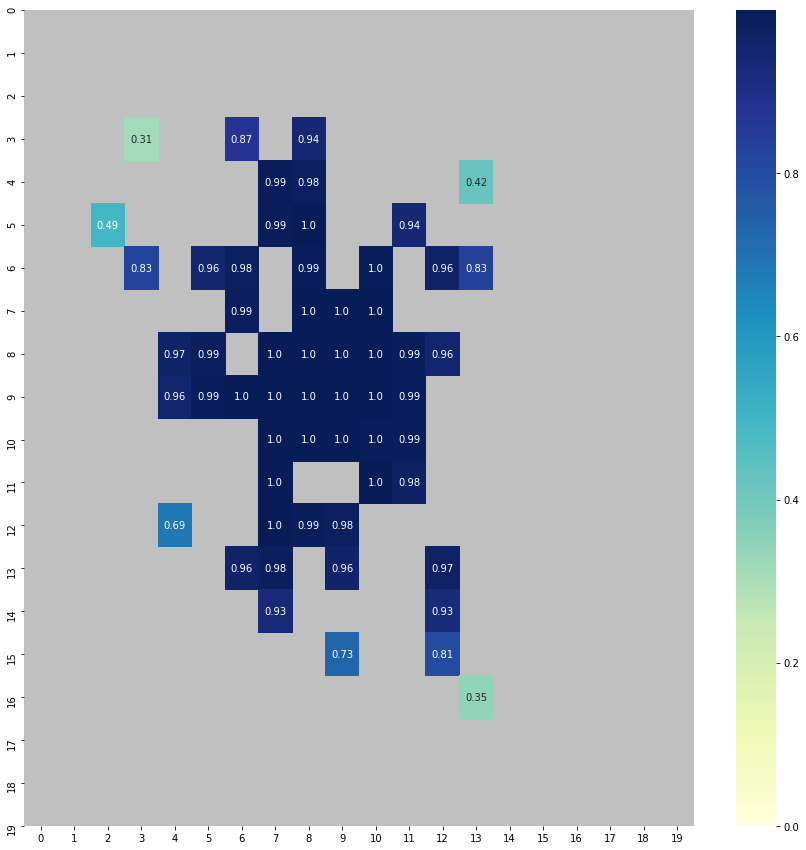

In [45]:
test_pred = model.predict(test_image)
pred_2d = test_pred[0, :, :, 0]

plt.figure(figsize=(15,15))
mask = pred_2d < 1e-2
ax = sns.heatmap(pred_2d[6:26, 6:26], mask=mask[6:26, 6:26], fmt=".2",annot=True, cmap='YlGnBu' )
ax.set_facecolor("silver")
# plt.title("Prediction mask (showing scores)")
plt.show()

#### Metrics by layer for N runs

In [46]:
dcs, dcs_dict = get_coef_by_layer(test_images, test_labels, model, 'dice')
# iou_vals, iou_dict = get_coef_by_layer(val_images, val_labels, model, 'iou')

In [47]:
print(dcs_dict['layer26'])

[0.8680919966979089, 0.9574492424181249, 0.34944558644143076, 0.7194690507999696, 0.7231979129501216, 0.6428139351591425, 0.9840063634368424, 0.4307777609385916, 0.9748139034086148, 0.5403018690519383, 0.8654593740354336, 0.41745121936583773, 0.6923432881624048, 0.9967691715034035, 0.7203722928581542, 0.5306646038221996, 0.9036928306979916, 0.5099041768142684, 0.9767339518847268, 0.4866081911184199, 0.7469143046516353, 0.8900052639974563, 0.7557507569966914, 0.875850095359777, 0.6916776708939665, 0.840489988835434, 0.8104674146192218, 0.798952370108337, 0.41156503245957893, 0.8166014291144134, 0.9550293799959868, 0.7002874114595404, 0.8659958042818933, 0.9341421815471962, 0.7877927493051072, 0.38672743735579823, 0.999435862444797, 0.8547654450876621, 0.5775779136980511, 0.5418328175486335, 0.9144459783426748, 0.6692422099160467, 0.4890769170001886, 0.4165176917813729, 0.8447202229444598, 0.4403154420471819, 0.7111236197705674, 0.45286638374111005, 0.7435672454800405, 0.5726471186155122

### Mean dice coef vs layer

In [48]:
dice_coef_means = []
for layer in range(num_layers):
    dice_coef_mean = np.mean(np.array(dcs_dict['layer'+str(layer)]))
    dice_coef_means.append(dice_coef_mean)
dice_coef_means = np.array(dice_coef_means)

In [49]:
dice_coef_means

array([0.75474808, 0.86875473, 0.94769401, 0.96453567, 0.97164094,
       0.97784676, 0.98218652, 0.98232368, 0.98347638, 0.98348585,
       0.98223204, 0.98305298, 0.9809957 , 0.97842641, 0.97694142,
       0.97368596, 0.96710899, 0.96094657, 0.94611327, 0.92712204,
       0.88884957, 0.80497464, 0.73825261, 0.73820861, 0.67018188,
       0.677532  , 0.71573502, 0.76315702, 0.7967547 , 0.78757577])

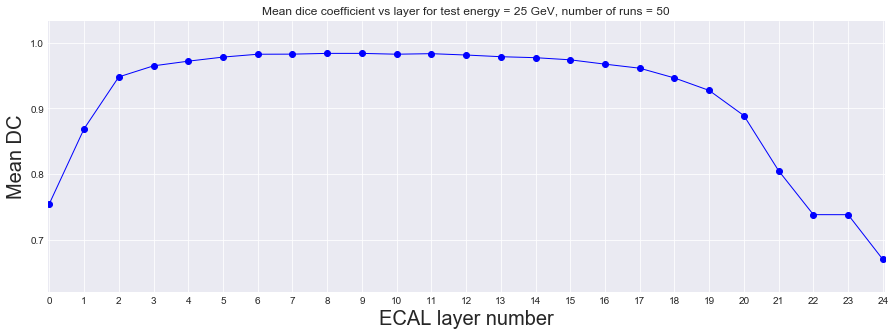

In [56]:
save_fig = False
plt.figure(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
plt.plot(dice_coef_means[0:25], marker='o', color='b', linewidth=1)
plt.title('Mean dice coefficient vs layer for test energy = 25 GeV, number of runs = %i' %(num_runs))
plt.xlabel('ECAL layer number', fontsize=20)
plt.ylabel('Mean DC', fontsize=20)
plt.xticks(range(0, 25))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylim(np.ndarray.min(dice_coef_means)-0.05, np.ndarray.max(dice_coef_means) + 0.05)
plt.xlim([-0.05, 24.05])
if save_fig is True:
    direct = 'plots/metrics_unet/'
    filename = 'mean_dice_coef_%.1fGeV_%iruns.png' %(test_energies[0], num_runs)
    plt.savefig(direct + filename)
plt.show()

### Mean IoU coef vs layer

In [58]:
iou_coef_means = []
for layer in range(num_layers):
    iou_coef_mean = np.mean(np.array(iou_dict['layer'+str(layer)]))
    iou_coef_means.append(iou_coef_mean)
iou_coef_means = np.array(iou_coef_means)

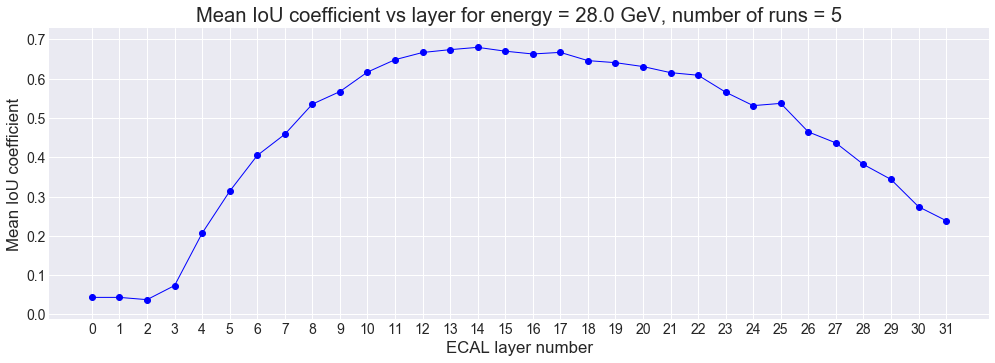

In [67]:
save_fig = False
plt.figure(figsize=(15,5))
plt.style.use('seaborn-darkgrid')
plt.plot(iou_coef_means, marker='o', color='b', linewidth=1)
plt.title('Mean IoU coefficient vs layer for energy = %.1f GeV, number of runs = %i' %(val_energies[0], num_runs))
plt.xlabel('ECAL layer number')
plt.ylabel('Mean IoU coefficient')
plt.xticks(range(0, 32))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.ylim(np.ndarray.min(iou_coef_means)-0.05, np.ndarray.max(iou_coef_means) + 0.05)
if save_fig is True:
    direct = 'plots/metrics_unet/'
    filename = 'mean_iou_coef_%.1fGeV_%iruns.png' %(val_energies[0], num_runs)
    plt.savefig(direct + filename)
plt.show()

#### Dice coef and IoU seem to be saying the same thing. Just plot dice coef from this point

# Metric vs Layer (for several energies)

In [57]:
en1 = np.array([0.2])
en2 = np.arange(1.0, 41.0, 4.0)
test_energies = np.append(en1, en2)
direct = 'simulations/single_hits/test/'

test_images = get_data_flat_raw(direct, test_energies, num_runs, 'images')
test_labels = get_data_flat_raw(direct, test_energies, num_runs, 'labels')
print(test_images.shape)
print(test_labels.shape)

(16500, 32, 32, 1)
(16500, 32, 32, 1)


In [58]:
dcs, dcs_dict = get_coef_by_layer(test_images, test_labels, model, 'dice') # 5 runs x 3 energies

In [59]:
dice_coef_means = []
for layer in range(num_layers):
    dice_coef_mean = np.mean(np.array(dcs_dict['layer'+str(layer)]))
    dice_coef_means.append(dice_coef_mean)
dice_coef_means = np.array(dice_coef_means)

In [60]:
energies_str = ''
for energy in test_energies:
    energies_str += str(energy) + '_'
energies_str = energies_str[:-1]
energies_str

'0.2_1.0_5.0_9.0_13.0_17.0_21.0_25.0_29.0_33.0_37.0'

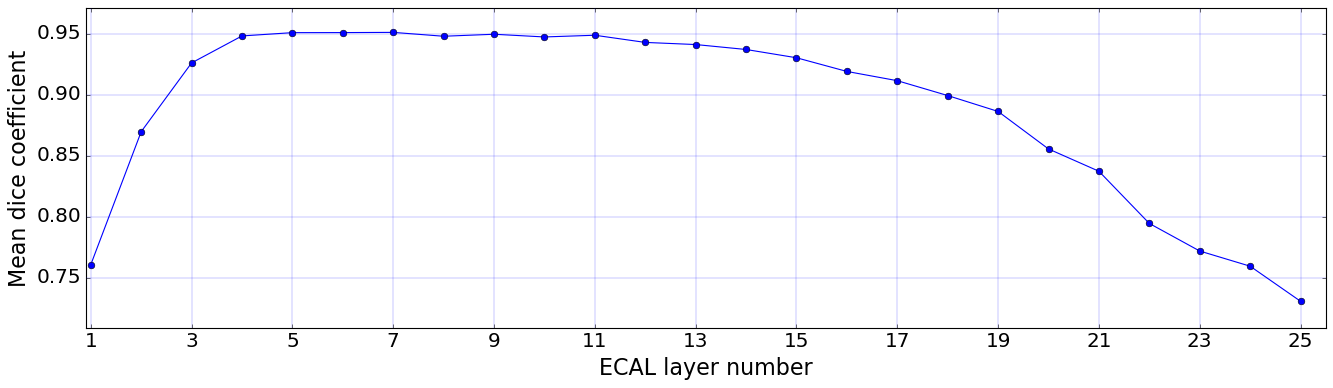

In [89]:
save_fig = False
plt.figure(figsize=(20,5))
plt.style.use('classic')
plt.plot(range(1, 26), dice_coef_means[0:25], marker='o', color='b', linewidth=1)
# plt.title('Mean DC vs layer for energies: %.1f - %.1f GeV, number of runs = %i' %(test_energies[0], test_energies[-1],
#                                                                                            num_runs))
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.xlabel('ECAL layer number', fontsize=20)
plt.ylabel('Mean dice coefficient', fontsize=20)
plt.xticks(range(1, 32, 2), fontsize=18)
plt.yticks(np.arange(0, 1.0, 0.05), fontsize=18)
plt.ylim(np.ndarray.min(dice_coef_means)-0.02, np.ndarray.max(dice_coef_means) + 0.02)
plt.xlim([0.9, 25.5])
if save_fig is True:
    direct = 'plots/metrics_unet/'
    filename = 'mean_iou_coef_' + energies_str + 'GeV_%iruns.png' %(num_runs)
    plt.savefig(direct + filename)
plt.show()

# Metric vs Energy (for all layers)

In [123]:
en1 = np.array([0.2])
en2 = np.arange(1.0, 41.0, 4.0)
val_energies = np.append(en1, en2); num_runs=50
direct = 'simulations/single_hits/test/'

val_images = get_data_flat_raw(direct, val_energies, num_runs, 'images')
val_labels = get_data_flat_raw(direct, val_energies, num_runs, 'labels')

#### Store metric info for every layer, corresponding to every energy

In [93]:
energies_dict = {}
means_by_energy = []
for energy in test_energies:
    print('Energy:', energy)
    test_images = get_data_flat_raw(direct, [energy], num_runs, 'images')
    test_labels = get_data_flat_raw(direct, [energy], num_runs, 'labels')
    dcs_info = get_coef_by_layer(test_images, test_labels, model, 'dice')
    energies_dict[energy] = dcs_info
    means_by_energy.append(np.mean(dcs_info[0]))
means_by_energy = np.array(means_by_energy)

Energy: 0.2
Energy: 1.0
Energy: 5.0
Energy: 9.0
Energy: 13.0
Energy: 17.0
Energy: 21.0
Energy: 25.0
Energy: 29.0
Energy: 33.0
Energy: 37.0


In [94]:
means_by_energy

array([0.7985265 , 0.82738684, 0.86273535, 0.85966885, 0.87374295,
       0.8819319 , 0.88296976, 0.88620207, 0.88902382, 0.89731845,
       0.90136377])

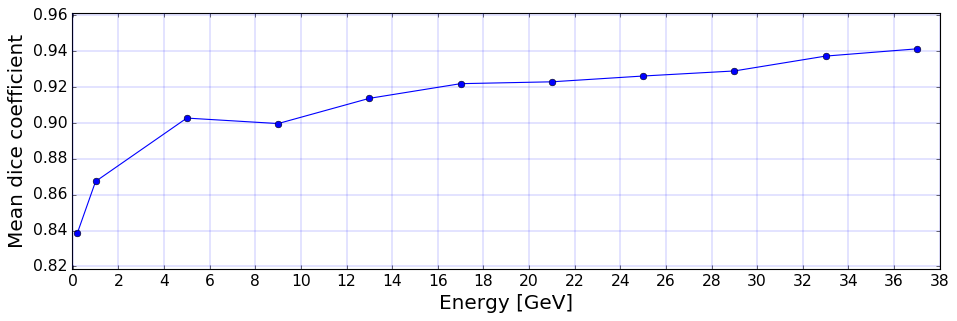

In [116]:
save_fig = False
plt.figure(figsize=(14,4))
plt.style.use('classic')
plt.plot(val_energies, means_by_energy+0.04, marker='o', color='b', linewidth=1)
# plt.title('Mean dice coefficient (over all layers) vs energies: %.1f - %.1f GeV, number of runs = %i' %(val_energies[0], val_energies[-1],
#                                                                                            num_runs))
plt.grid(color='b', linestyle='-', linewidth=0.2)
plt.xlabel('Energy [GeV]', fontsize=18)
plt.ylabel('Mean dice coefficient', fontsize=18)
plt.yticks(np.arange(0, 1.0, 0.02), fontsize=14)
plt.xticks(range(0, 41, 2), fontsize = 14)
plt.ylim(np.ndarray.min(means_by_energy)+0.02, np.ndarray.max(means_by_energy) + 0.06)
plt.xlim([-0.05, 38])
if save_fig is True:
    direct = 'plots/metrics_unet/'
    filename = 'mean_coef_by_energy_%iruns.png' %(num_runs)
    plt.savefig(direct + filename)
plt.show()

# Metric vs Noise (for several energies)

In [119]:
val_energies = [0.1, 20, 24, 28, 32, 36, 40] 
num_runs=500; num_layers=32
direct = 'simulations/single_hits/'

In [124]:
means_by_noise = []
noise_vals = np.arange(0.0, 0.11, 0.01)
for noise in noise_vals:
    val_images = get_data_flat_raw(direct, val_energies, num_runs, 'images', add_noise=True, noise=noise)
    val_labels = get_data_flat_raw(direct, val_energies, num_runs, 'labels')
    dcs_info = get_coef_by_layer(val_images, val_labels, model, 'dice')
    means_by_noise.append(np.mean(dcs_info[0]))
means_by_noise = np.array(means_by_noise)

KeyboardInterrupt: 

In [ ]:
means_by_noise

In [ ]:
save_fig = False
plt.figure(figsize=(18,6))
plt.style.use('seaborn-darkgrid')
plt.plot(noise_vals*100, means_by_noise+0.05, marker='o', color='b', linewidth=1)
# plt.title('Mean dice coefficient (over all layers) vs energies: %.1f - %.1f GeV, number of runs = %i' %(val_energies[0], val_energies[-1],
#                                                                                            num_runs))
plt.xlabel('Noise (%)', fontsize=20)
plt.ylabel('Mean dice coefficient', fontsize=20)
plt.xticks(noise_vals*100, fontsize=18)
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=18)
plt.ylim(np.ndarray.min(means_by_noise)+0.03, np.ndarray.max(means_by_noise) + 0.1)
if save_fig is True:
    direct = 'plots/metrics_unet/'
    filename = 'mean_coef_by_energy_%iruns.png' %(num_runs)
    plt.savefig(direct + filename)
plt.show()